<a href="https://colab.research.google.com/github/ballysingh11/pyweather/blob/master/Walmart_Sales_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('Walmart DataSet.csv')
data.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


In [ ]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [ ]:
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [ ]:
data.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

<ipython-input-65-1a72a8b5b870>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date'] = pd.to_datetime(data['Date'])


In [ ]:
data.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

In [ ]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
data.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [ ]:
data['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [ ]:
data['month'] = data['Date'].dt.month
data['year'] = data['Date'].dt.year
data['week'] = data['Date'].dt.week

<ipython-input-70-f34490b1e89e>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data['week'] = data['Date'].dt.week


In [ ]:
data.head(3)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month,year,week
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,5,2010,17
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,12,2010,48
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010,7


In [ ]:
data.groupby('month')['Weekly_Sales'].mean()

month
1     9.476139e+05
2     1.054597e+06
3     1.024975e+06
4     1.024324e+06
5     1.035379e+06
6     1.064848e+06
7     1.014212e+06
8     1.044874e+06
9     1.009457e+06
10    1.030631e+06
11    1.133751e+06
12    1.210255e+06
Name: Weekly_Sales, dtype: float64

In [ ]:
data.groupby('year')['Weekly_Sales'].mean()

year
2010    1.059670e+06
2011    1.046239e+06
2012    1.033660e+06
Name: Weekly_Sales, dtype: float64

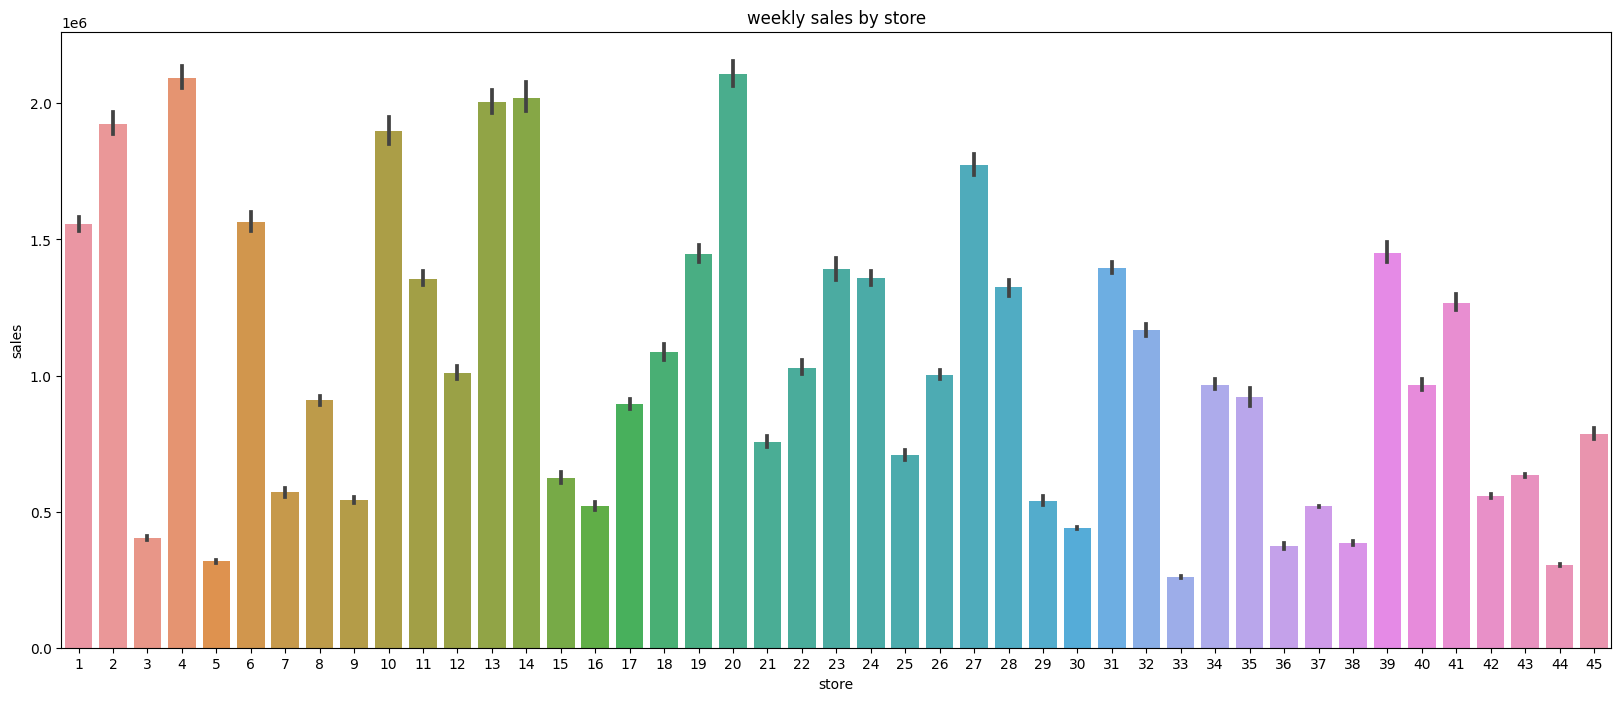

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(x='Store', y='Weekly_Sales', data=data)
plt.title('weekly sales by store')
plt.xlabel('store')
plt.ylabel('sales')
plt.show()

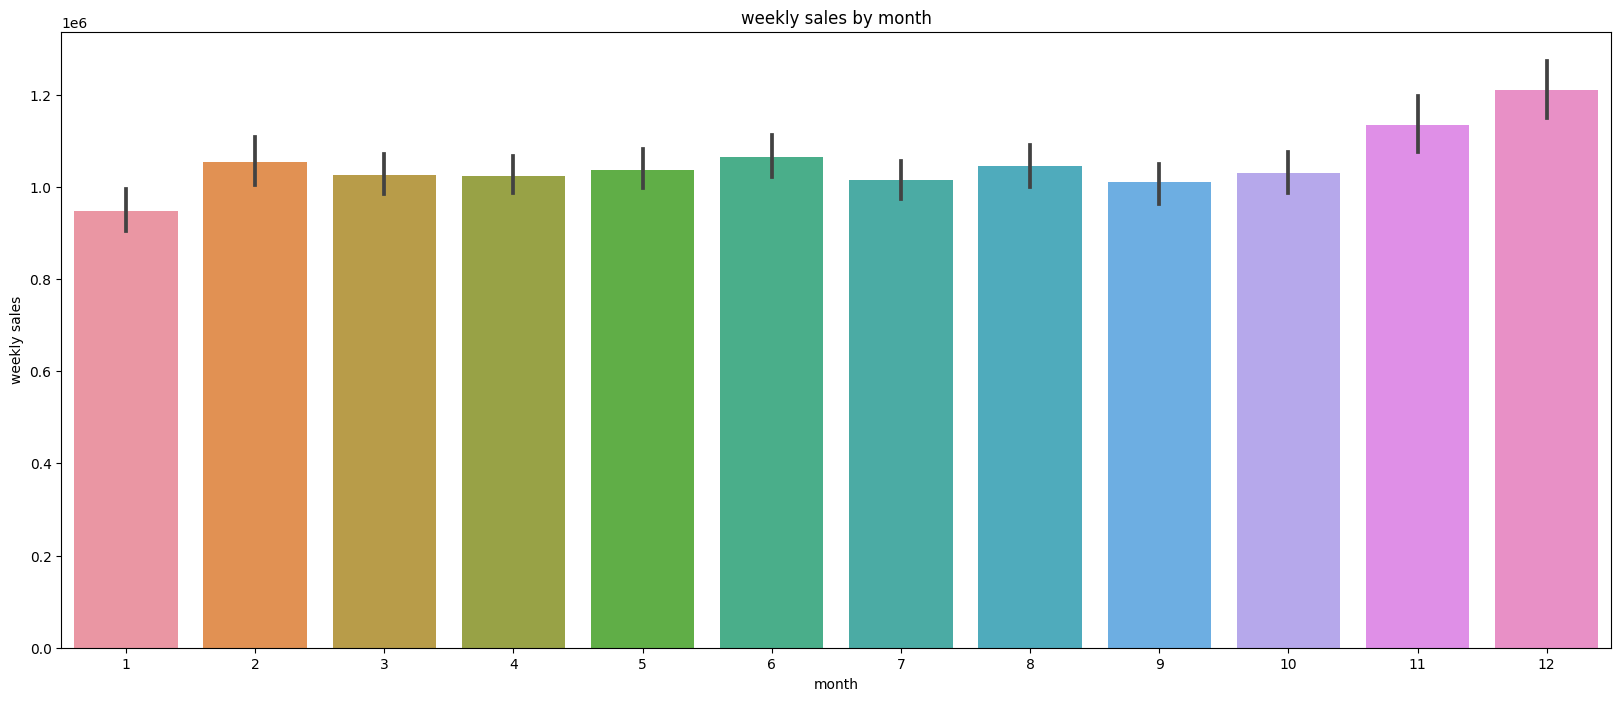

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(x='month', y='Weekly_Sales', data=data)
plt.title('weekly sales by month')
plt.xlabel('month')
plt.ylabel('weekly sales')
plt.show()

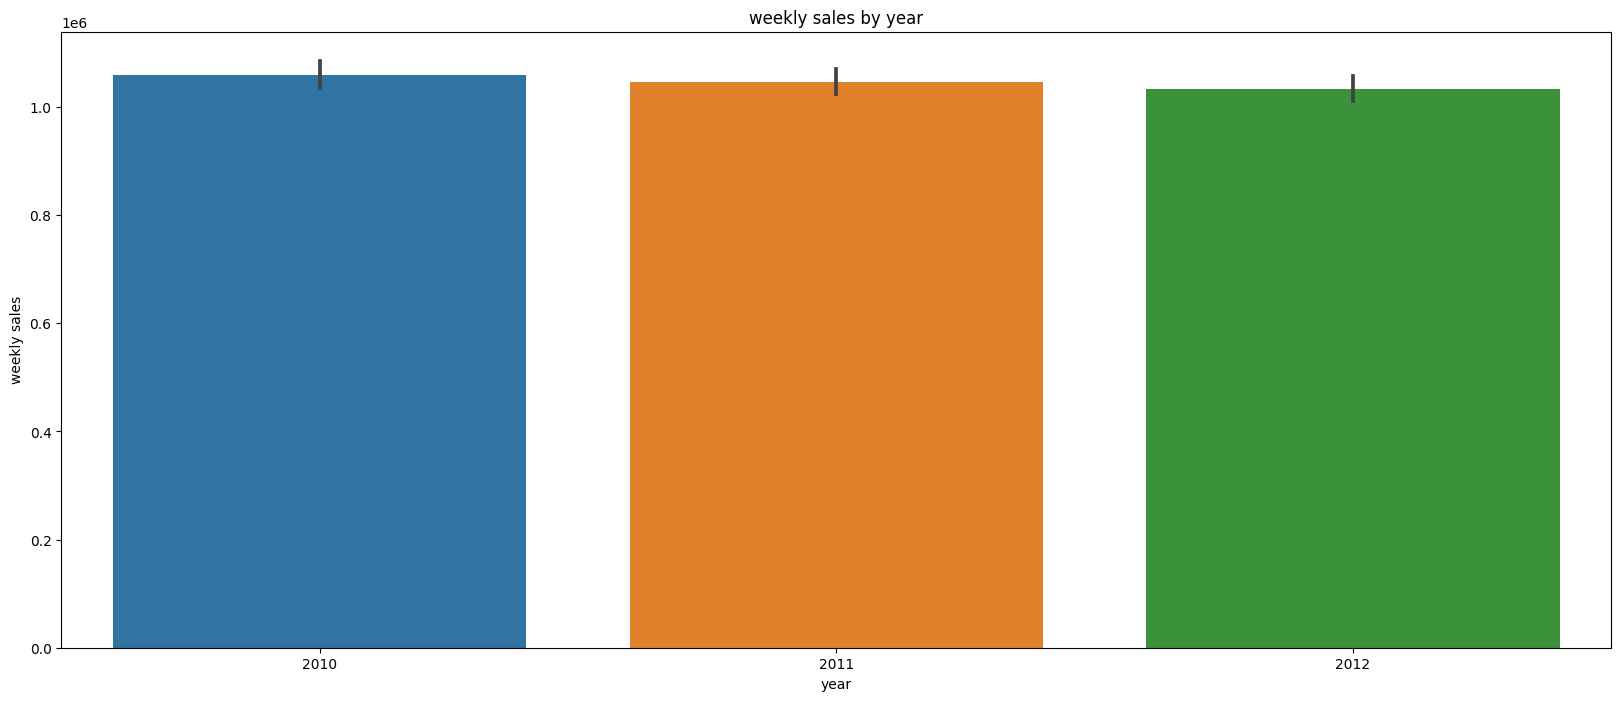

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(x='year', y='Weekly_Sales', data=data)
plt.title('weekly sales by year')
plt.xlabel('year')
plt.ylabel('weekly sales')
plt.show()

<Axes: xlabel='Holiday_Flag', ylabel='count'>

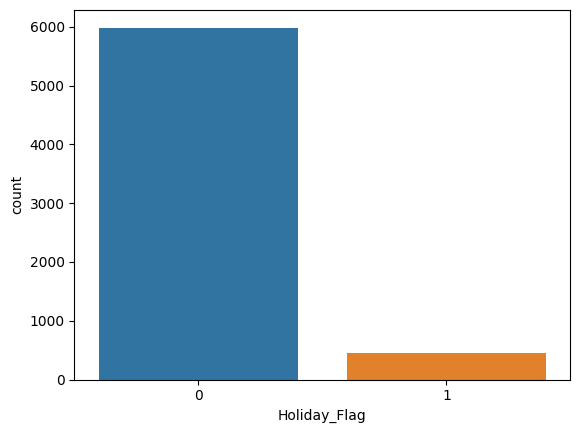

In [ ]:
sns.countplot(x = 'Holiday_Flag', data = data)

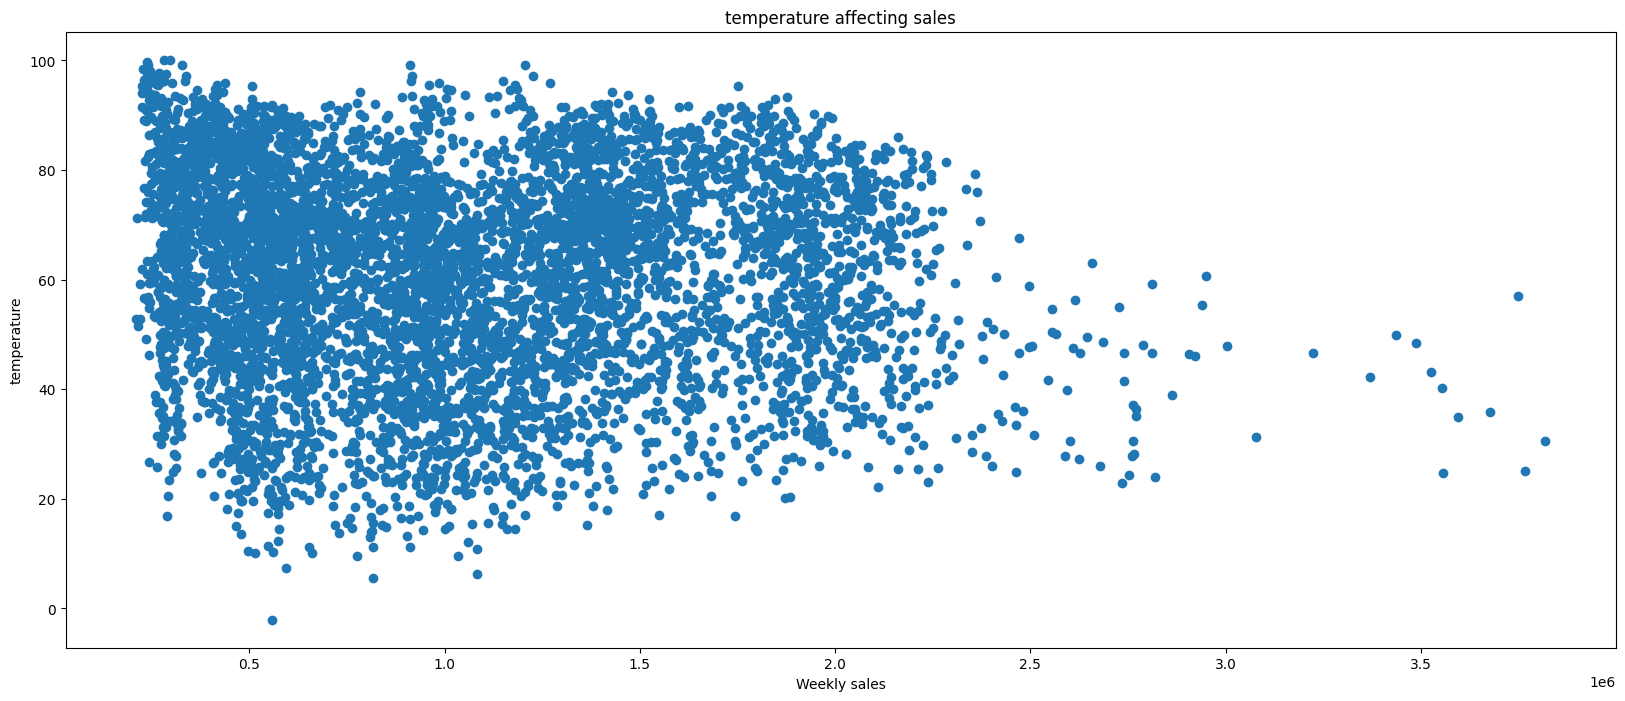

In [ ]:
plt.figure(figsize = (20,8))
plt.scatter(data['Weekly_Sales'], data['Temperature'])
plt.xlabel('Weekly sales')
plt.ylabel('temperature')
plt.title('temperature affecting sales')
plt.show()

In [ ]:
total_sales_by_store = data.groupby('Store')['Weekly_Sales'].sum()
worst_performing_store = total_sales_by_store.idxmin()
print(total_sales_by_store)

Store
1     2.224028e+08
2     2.753824e+08
3     5.758674e+07
4     2.995440e+08
5     4.547569e+07
6     2.237561e+08
7     8.159828e+07
8     1.299512e+08
9     7.778922e+07
10    2.716177e+08
11    1.939628e+08
12    1.442872e+08
13    2.865177e+08
14    2.889999e+08
15    8.913368e+07
16    7.425243e+07
17    1.277821e+08
18    1.551147e+08
19    2.066349e+08
20    3.013978e+08
21    1.081179e+08
22    1.470756e+08
23    1.987506e+08
24    1.940160e+08
25    1.010612e+08
26    1.434164e+08
27    2.538559e+08
28    1.892637e+08
29    7.714155e+07
30    6.271689e+07
31    1.996139e+08
32    1.668192e+08
33    3.716022e+07
34    1.382498e+08
35    1.315207e+08
36    5.341221e+07
37    7.420274e+07
38    5.515963e+07
39    2.074455e+08
40    1.378703e+08
41    1.813419e+08
42    7.956575e+07
43    9.056544e+07
44    4.329309e+07
45    1.123953e+08
Name: Weekly_Sales, dtype: float64


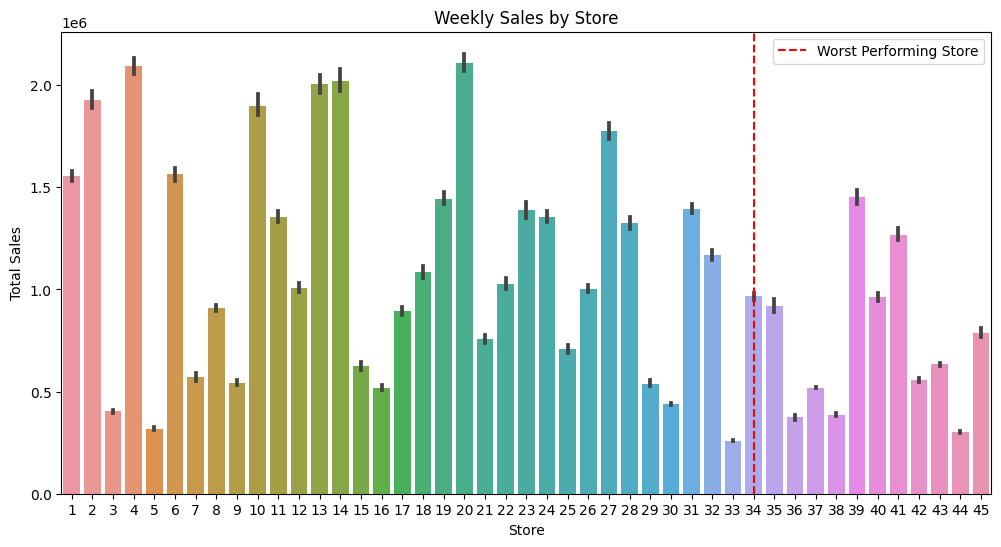

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Store', y='Weekly_Sales', data=data)
plt.title('Weekly Sales by Store')
plt.xlabel('Store')
plt.ylabel('Total Sales')

# Highlight the worst-performing store in red
plt.axvline(x=worst_performing_store, color='red', linestyle='--', label='Worst Performing Store')

plt.legend()
plt.show()

In [ ]:
total_sales_by_store = data.groupby('Store')['Weekly_Sales'].sum()
good_performing_store = total_sales_by_store.idxmax()

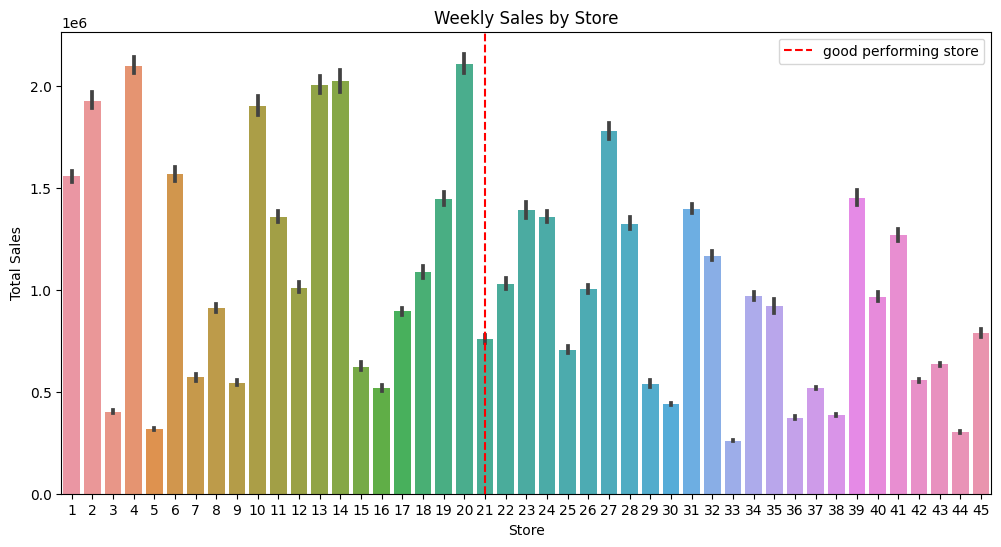

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Store', y='Weekly_Sales', data=data)
plt.title('Weekly Sales by Store')
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.axvline(x = good_performing_store, linestyle = '--', color = 'red',label = 'good performing store' )
plt.legend()
plt.show()

<ipython-input-81-b8618fe9c614>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap = 'Blues', annot = True)


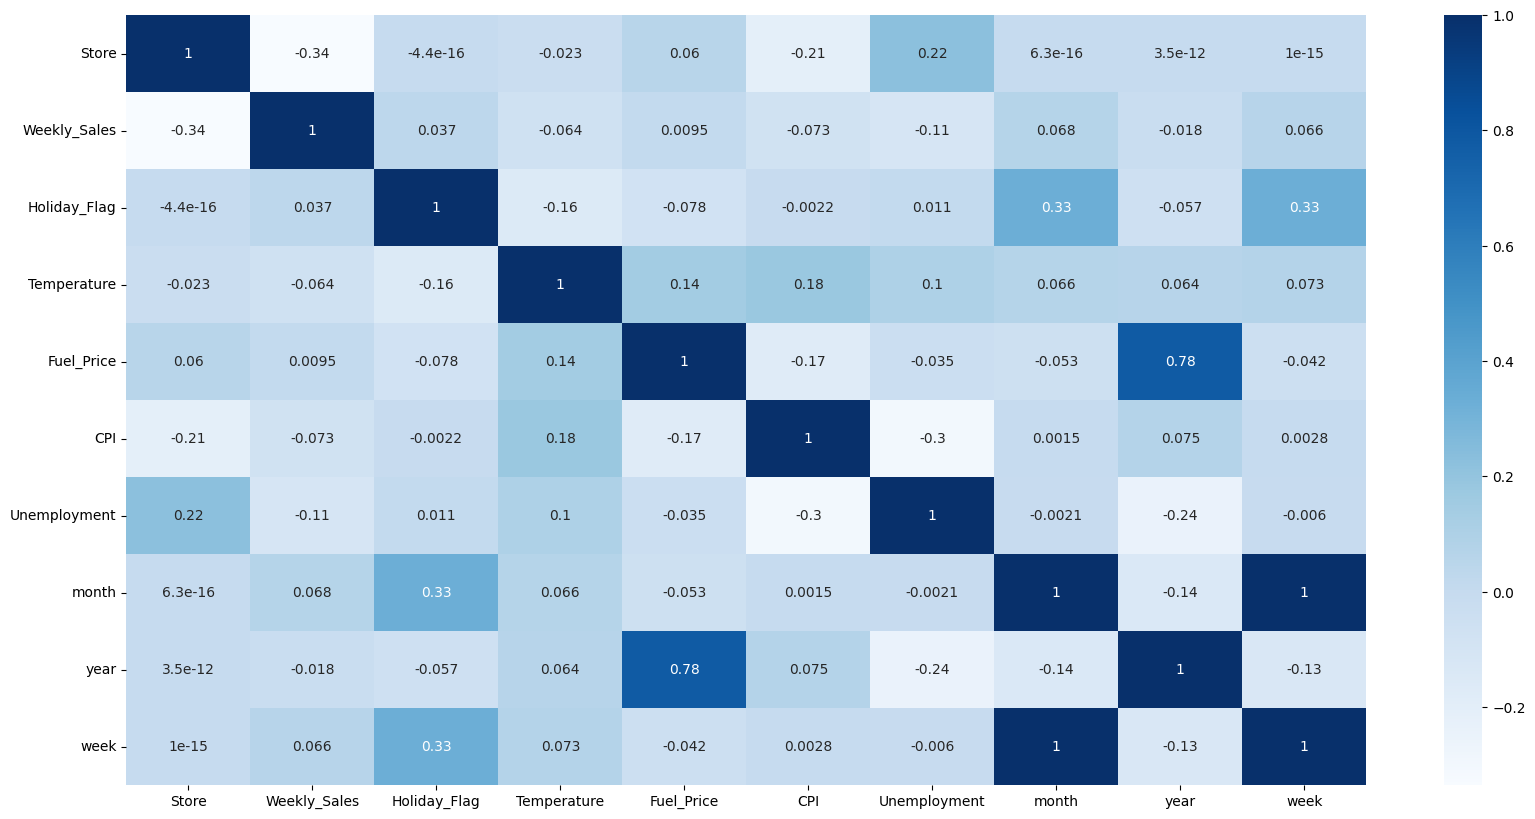

In [ ]:
plt.figure(figsize = (20,10))
sns.heatmap(data.corr(), cmap = 'Blues', annot = True)
plt.show()